In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textwrap import dedent
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## Zadanie 1

In [2]:
# OLS (jedna zmienna)
def fit_simple_linear_regression(x: np.ndarray, y: np.ndarray):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    x_mean = x.mean()
    y_mean = y.mean()
    Sxy = np.sum((x - x_mean) * (y - y_mean))
    Sxx = np.sum((x - x_mean) ** 2)
    b1 = Sxy / Sxx
    b0 = y_mean - b1 * x_mean
    return b0, b1

Estymowany b0: 3.4960
Estymowany b1: 1.9972
R^2: 0.8795

Prawdziwy model użyty do generacji danych:
y = 3.5 + 2.0 * x + N(0, 4.0)


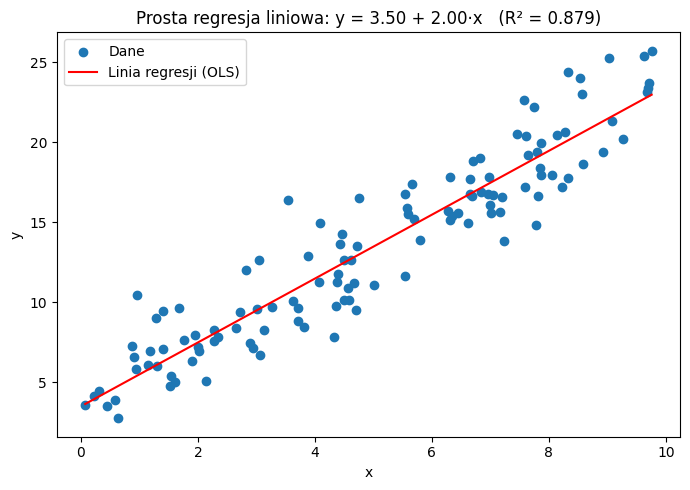

In [ ]:
# Dane syntetyczne (y = a + b*x + szum)
rng = np.random.default_rng(42)
n = 120
a_true = 3.5
b_true = 2.0
sigma = 2.0

x = rng.uniform(0, 10, size=n)
noise = rng.normal(0, sigma, size=n)
y = a_true + b_true * x + noise

b0_hat, b1_hat = fit_simple_linear_regression(x, y)

y_hat = b0_hat + b1_hat * x

print(f"Estymowany b0: {b0_hat:.4f}")
print(f"Estymowany b1: {b1_hat:.4f}")
print()
print("Prawdziwy model użyty do generacji danych:")
print(f"y = {a_true} + {b_true} * x + N(0, {sigma**2})")


fig = plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="Dane")
x_line = np.linspace(x.min(), x.max(), 200)
y_line = b0_hat + b1_hat * x_line
plt.plot(x_line, y_line, color="red", label="Linia regresji (OLS)")
plt.title(f"Prosta regresja liniowa: y = {b0_hat:.2f} + {b1_hat:.2f}·x   (R² = {r2:.3f})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


## Zadanie 2

,manual,sklearn,abs_diff
b0,3.496017,3.496017,1.776357e-15
b1,1.997191,1.997191,4.440892e-16


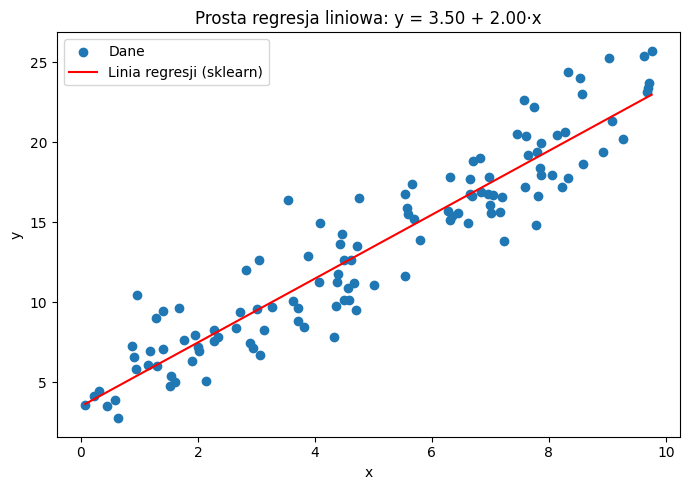

In [5]:
X_skl = x.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_skl, y)
y_hat_skl = lr.predict(X_skl)

coeffs_compare = pd.DataFrame({
    "manual": [b0_hat, b1_hat],
    "sklearn": [lr.intercept_, lr.coef_[0]],
    "abs_diff": [abs(b0_hat - lr.intercept_), abs(b1_hat - lr.coef_[0])]
}, index=["b0", "b1"])

display(coeffs_compare)

plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="Dane")
x_line = np.linspace(x.min(), x.max(), 200)
plt.plot(x_line, lr.intercept_ + lr.coef_[0] * x_line, color="red", label="Linia regresji (sklearn)")
plt.title(f"Prosta regresja liniowa: y = {lr.intercept_:.2f} + {lr.coef_[0]:.2f}·x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

Boston Housing

funkcja potrzebna też w zad 3

In [ ]:
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return dict(MSE=mse, RMSE=rmse, MAE=mae, R2=r2)

In [6]:
path = "HousingData.csv"
df = pd.read_csv(path)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,MSE,RMSE,MAE,R2
Test,31.454048,5.608391,3.367983,0.627085


,coef,abs_coef
NOX,-17.079257,17.079257
RM,4.258091,4.258091
CHAS,1.983837,1.983837
DIS,-1.424189,1.424189
PTRATIO,-0.975835,0.975835
LSTAT,-0.388620,0.388620
RAD,0.235588,0.235588
CRIM,-0.112187,0.112187
ZN,0.042440,0.042440
INDUS,0.025673,0.025673


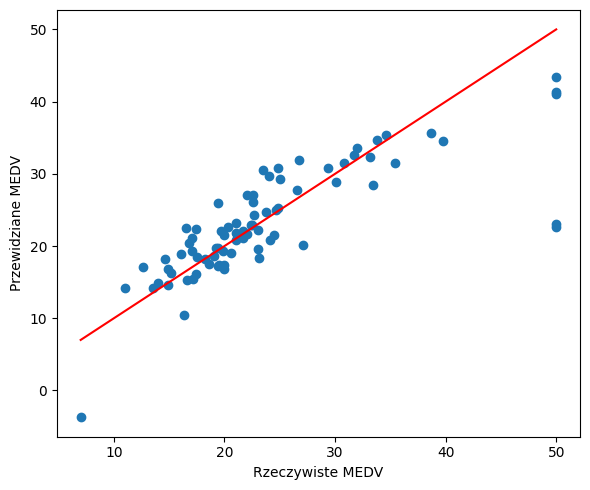

In [8]:
y_boston = df["MEDV"].values
X_boston = df.drop(columns=["MEDV"])

mask = pd.notnull(X_boston).all(axis=1) & pd.notnull(df["MEDV"])
X_boston = X_boston.loc[mask]
y_boston = y_boston[mask.values]

X_train, X_test, y_train, y_test = train_test_split(
    X_boston, y_boston, test_size=0.2, random_state=42
)

model_boston = LinearRegression()
model_boston.fit(X_train, y_train)
y_pred_test = model_boston.predict(X_test)

metrics_boston = metrics(y_test, y_pred_test)
metrics_boston_df = pd.DataFrame([metrics_boston], index=["Test"])

coefs = pd.Series(model_boston.coef_, index=X_boston.columns, name="coef")
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)
coefs_df = pd.DataFrame({"coef": coefs_sorted, "abs_coef": coefs_sorted.abs()})

display(metrics_boston_df)
display(coefs_df)

# Wykres: y_test vs y_pred_test
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Rzeczywiste MEDV")
plt.ylabel("Przewidziane MEDV")
plt.tight_layout()
plt.show()


## Zadanie 3

In [ ]:
metrics_manual = metrics(y, y_hat)
metrics_skl = metrics(y, y_hat_skl)

metrics_compare = pd.DataFrame([metrics_manual, metrics_skl], index=["manual", "sklearn"])

display(metrics_compare)

,MSE,RMSE,MAE,R2
manual,4.06188,2.015411,1.605002,0.879478
sklearn,4.06188,2.015411,1.605002,0.879478
